In [1]:
import gym
import MCTSnet
import copy
import torch

In [2]:
env = gym.make("SokobanEnc-v0")

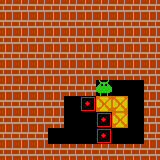

In [3]:
env.render()

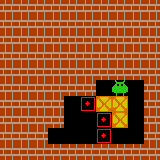

In [4]:
res = env.step(3)
env.render()

In [5]:
e = MCTSnet.models.embedding.Epsilon()

In [6]:
state = torch.Tensor(res[0])
state.reshape((-1,4,10,10)).shape

torch.Size([1, 4, 10, 10])

In [7]:
embed = e.forward(state.reshape((-1, 4, 10, 10)))

In [8]:
reward = torch.tensor([res[1]], requires_grad=True)
action = torch.tensor([3.], requires_grad=True)

In [9]:
b = MCTSnet.models.backup.BetaMLP()

In [10]:
h_s = b(embed, embed, reward.reshape((-1, 1)), action.reshape((-1, 1)))

In [11]:
r = MCTSnet.models.readout.Rho()

In [12]:
r(h_s)

tensor([[0.1110, 0.1341, 0.1305, 0.1314, 0.1281, 0.1309, 0.1241, 0.1099]],
       grad_fn=<SoftmaxBackward>)

In [13]:
pi = MCTSnet.models.policy.Pi()
actions = pi(torch.cat((h_s, h_s, h_s, h_s, h_s, h_s, h_s, h_s, h_s), dim=0).reshape(-1, 9, 128))

In [14]:
actions

tensor([[0.1267, 0.1279, 0.1248, 0.1225, 0.1211, 0.1206, 0.1273, 0.1291]],
       grad_fn=<SoftmaxBackward>)

In [15]:
torch.argmax(actions)

tensor(7)

In [16]:
state.shape

torch.Size([4, 10, 10])

In [17]:
m_net = MCTSnet.models.MCTSnet.MCTSnet(env, b, e, pi, r)
m_net(state.reshape((-1, 4, 10, 10)))

tensor([[0.1142, 0.1326, 0.1297, 0.1311, 0.1232, 0.1315, 0.1232, 0.1145],
        [0.1142, 0.1326, 0.1297, 0.1311, 0.1232, 0.1315, 0.1232, 0.1145],
        [0.1142, 0.1326, 0.1297, 0.1311, 0.1232, 0.1315, 0.1232, 0.1145],
        [0.1142, 0.1326, 0.1297, 0.1311, 0.1232, 0.1315, 0.1232, 0.1145],
        [0.1142, 0.1326, 0.1297, 0.1311, 0.1232, 0.1315, 0.1232, 0.1145],
        [0.1142, 0.1326, 0.1297, 0.1311, 0.1232, 0.1315, 0.1232, 0.1145],
        [0.1156, 0.1314, 0.1327, 0.1299, 0.1252, 0.1342, 0.1179, 0.1132],
        [0.1113, 0.1301, 0.1373, 0.1249, 0.1307, 0.1338, 0.1341, 0.0978]],
       grad_fn=<SoftmaxBackward>)